In [2]:
import numpy as np

import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import datetime
import glob
from matplotlib.colors import Normalize, LogNorm, PowerNorm
import cv2
import PIL



def set_axis(x, no_labels = 7)->tuple[np.array, np.array]:
    """Sets the x-axis positions and labels for a plot.

    Args:
        x (np.array): The x-axis data.
        no_labels (int, optional): The number of labels to display. Defaults to 7.

    Returns:
        tuple[np.array, np.array]: A tuple containing:
            - The positions of the labels on the x-axis.
            - The labels themselves.
    """
    nx = x.shape[0]
    step_x = int(nx / (no_labels - 1)) 
    x_positions = np.arange(0,nx,step_x) 
    x_labels = x[::step_x]
    return x_positions, x_labels


In [3]:
def imshow(a):
    # cv2.imshow('ImageWindow', img)
    # cv2.waitKey()
    # cv2.destroyAllWindows()
    # cv2.waitKey(1)
    a = a.clip(0, 255).astype("uint8")
    if a.ndim == 3:
        if a.shape[2] == 4:
            a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
        else:
            a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
    display(PIL.Image.fromarray(a))

In [4]:
path_out = '20240507_cut_npy/'
files = glob.glob(path_out+"*")
files.sort()

In [5]:
dx= 5.106500953873407
dt= 0.0016


data = []
first_file = '20240507_cut_npy/090622.npy' #\\
last_file = '20240507_cut_npy/090812.npy' #\\
for file in files:
   if file >= first_file and file <= last_file:
      data.append(np.load(file))

data = np.concatenate(data)
time_start = datetime.datetime.strptime('2024-05-07 ' + first_file.split("/")[-1].split(".")[0], "%Y-%m-%d %H%M%S") #\\
index = pd.date_range(start=time_start, periods=len(data), freq=f'{dt}s')


columns = np.arange(len(data[0])) * dx


df = pd.DataFrame(data=data, index=index, columns=columns)

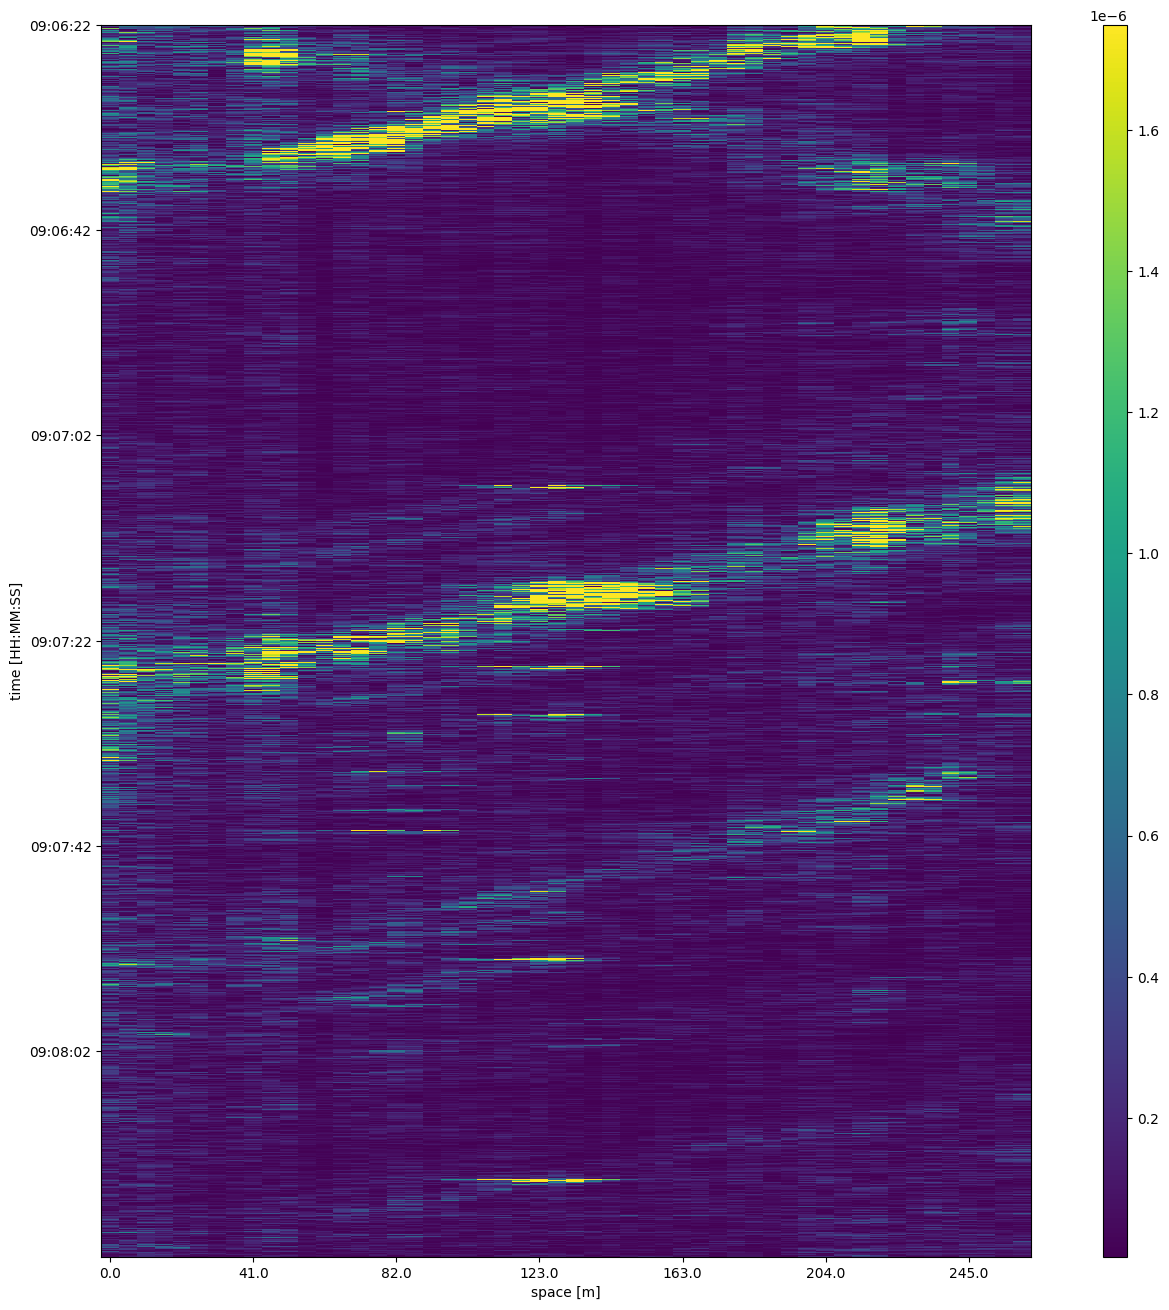

In [6]:
fig = plt.figure(figsize=(12,16))
ax = plt.axes()

# This is an example transformation and should be converted to the proper algorithm
df -= df.mean()
df = np.abs(df) 
low, high = np.percentile(df, [3, 99]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

im = ax.imshow(df,interpolation='none',aspect='auto',norm=norm)
plt.ylabel('time [HH:MM:SS]')
plt.xlabel('space [m]')

cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
plt.colorbar(im, cax=cax)
x_positions, x_labels = set_axis(df.columns)
ax.set_xticks(x_positions, np.round(x_labels))
y_positions, y_labels = set_axis(df.index.time)
ax.set_yticks(y_positions, y_labels)
plt.show()


In [7]:
np.info(df.values)
print("Max:", np.max(df))
print("Min:", np.min(df))
print("Mean:", np.mean(df))
print(np.percentile(df, [0, 5, 25, 50, 75, 95, 100]))

class:  ndarray
shape:  (75000, 52)
strides:  (208, 4)
itemsize:  4
aligned:  True
contiguous:  True
fortran:  False
data pointer: 0x318ee4000
byteorder:  little
byteswap:  False
type: float32
Max: 3.388192e-05
Min: 3.9038398e-11
Mean: 1.7946165e-07
[3.90383975e-11 5.34217559e-09 3.48885543e-08 8.08361165e-08
 1.71666883e-07 6.21201025e-07 3.38819191e-05]


In [8]:
def plotting_function(data, idx, cols, norm=None):
    df = pd.DataFrame(data, index = idx, columns=cols)

    fig = plt.figure(figsize=(12,16))
    ax = plt.axes()
    
    if norm is not None:
        im = ax.imshow(df,interpolation='none',aspect='auto',norm=norm)
    else:
        im = ax.imshow(df,interpolation='none',aspect='auto')

    plt.ylabel('time [HH:MM:SS]')
    plt.xlabel('space [m]')

    cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(im, cax=cax)
    x_positions, x_labels = set_axis(cols)
    ax.set_xticks(x_positions, np.round(x_labels))
    y_positions, y_labels = set_axis(df.index.time)
    ax.set_yticks(y_positions, y_labels)
    plt.show()

def display_gray(data, idx, cols, norm=None):
    df = pd.DataFrame(data, index = idx, columns=cols)

    fig = plt.figure(figsize=(12,16))
    ax = plt.axes()
    
    if norm is not None:
        im = ax.imshow(df,interpolation='none',aspect='auto',norm=norm, cmap='gray')
    else:
        im = ax.imshow(df,interpolation='none',aspect='auto', cmap='gray')

    plt.ylabel('time [HH:MM:SS]')
    plt.xlabel('space [m]')

    cax = fig.add_axes([ax.get_position().x1+0.06,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(im, cax=cax)
    x_positions, x_labels = set_axis(cols)
    ax.set_xticks(x_positions, np.round(x_labels))
    y_positions, y_labels = set_axis(df.index.time)
    ax.set_yticks(y_positions, y_labels)
    plt.show()

## **Step 0** ##

### **a) Plotting raw data** ###

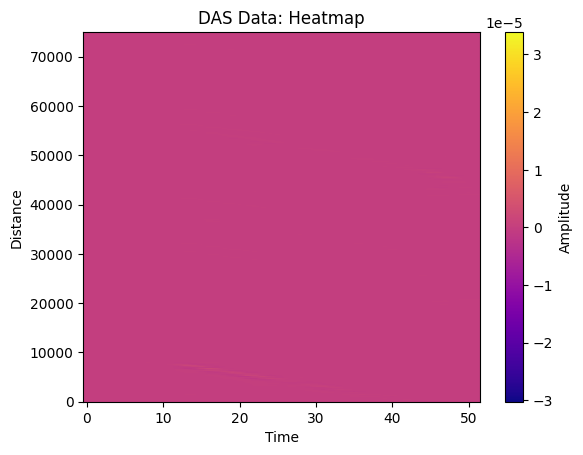

In [9]:
plt.imshow(data, aspect='auto', origin='lower', cmap='plasma')
plt.colorbar(label='Amplitude')
plt.title('DAS Data: Heatmap')
plt.xlabel('Time')
plt.ylabel('Distance')
plt.show()

### **b) Min-Max normalization** ###

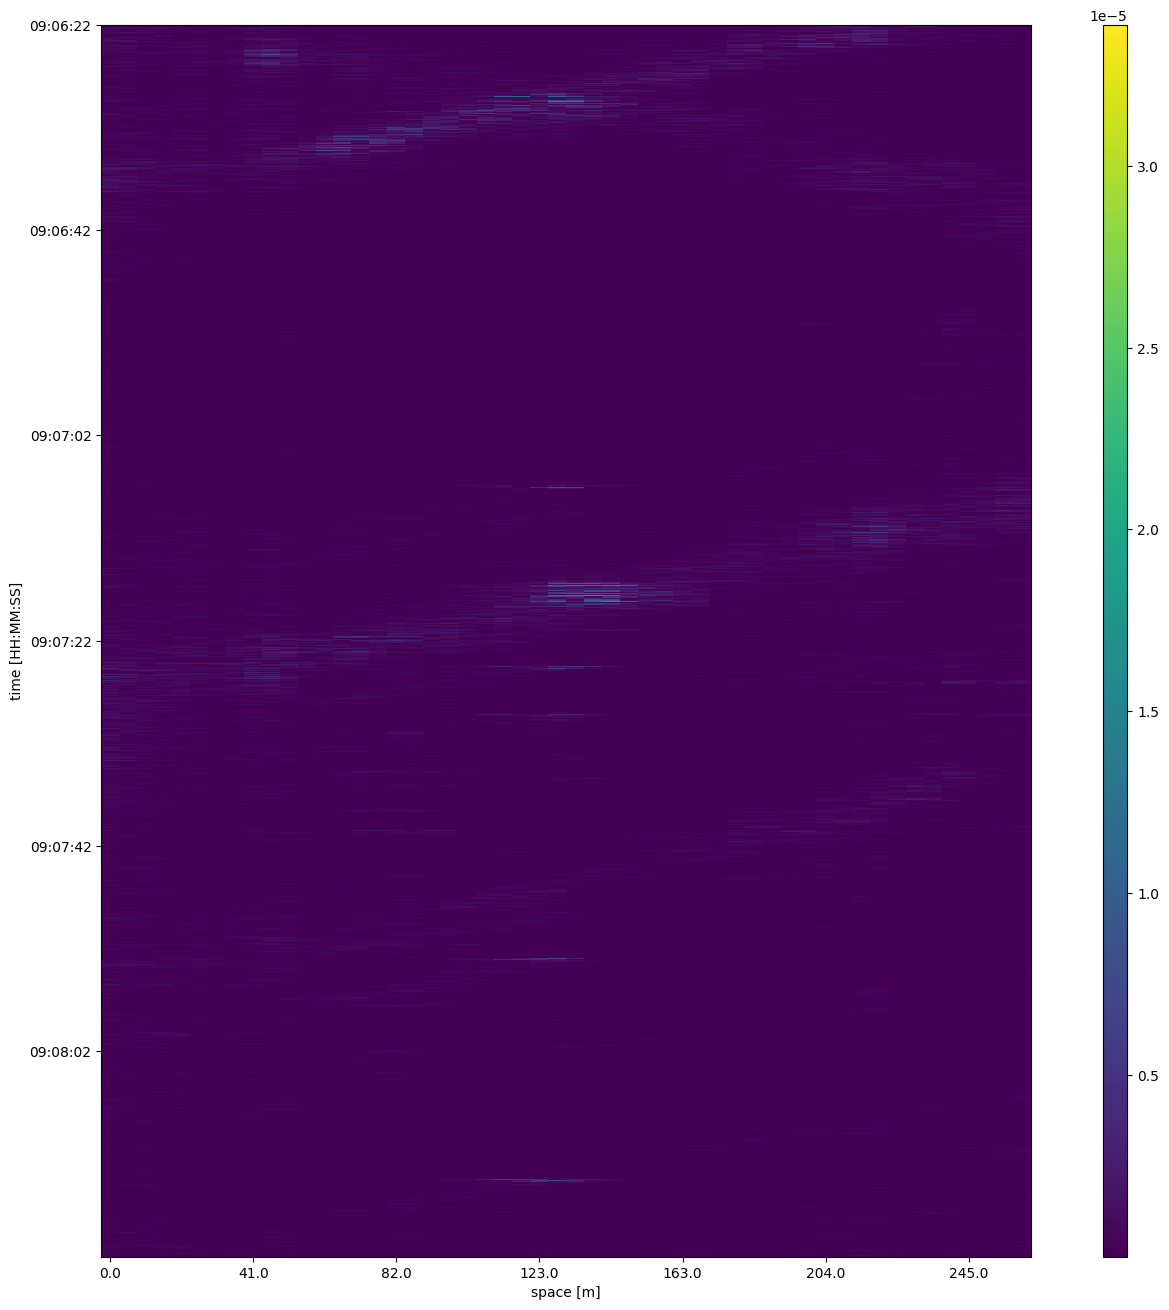

In [10]:
low, high = np.percentile(df, [0, 100]) 
norm = Normalize(vmin=low, vmax=high, clip=True)

plotting_function(abs(data), index, columns, norm)

### **b) Min-Max Normalization upgraded** ###

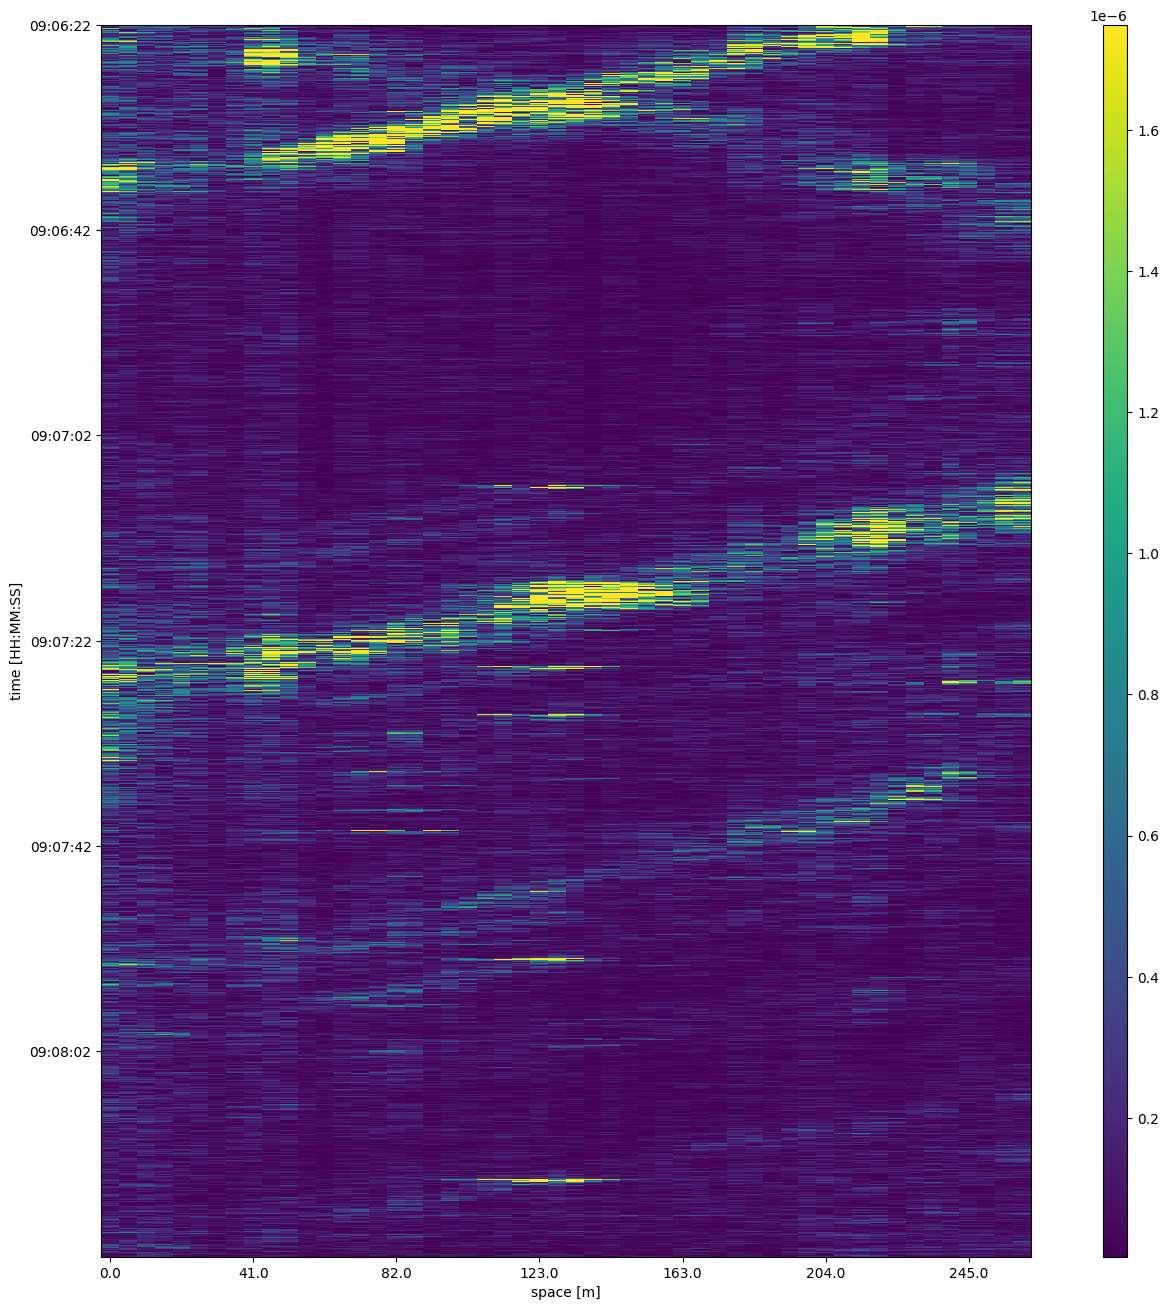

In [11]:
low, high = np.percentile(df, [3, 99]) 
norm_mm = Normalize(vmin=low, vmax=high, clip=True)

plotting_function(abs(data), index, columns, norm_mm)

### **c) Log scaling** ###

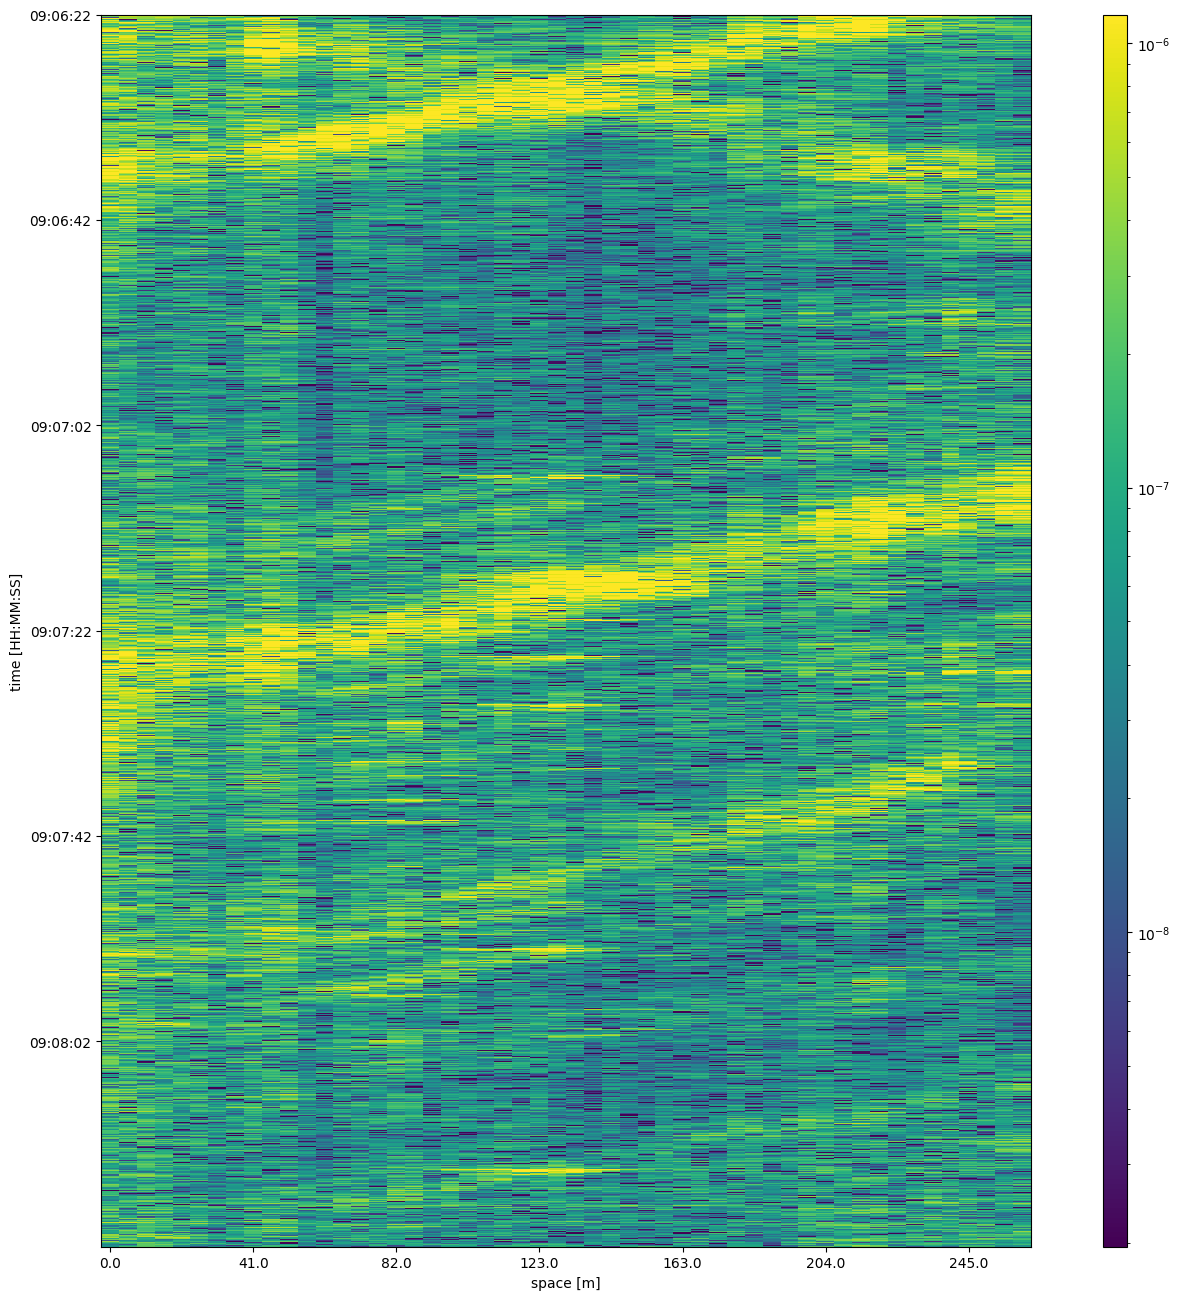

In [12]:
low, high = np.percentile(df, [2, 98]) 
norm_log = LogNorm(vmin=low, vmax=high, clip=True)

plotting_function(abs(data), index, columns, norm_log)

### **d) Power Norm Scaling** ###

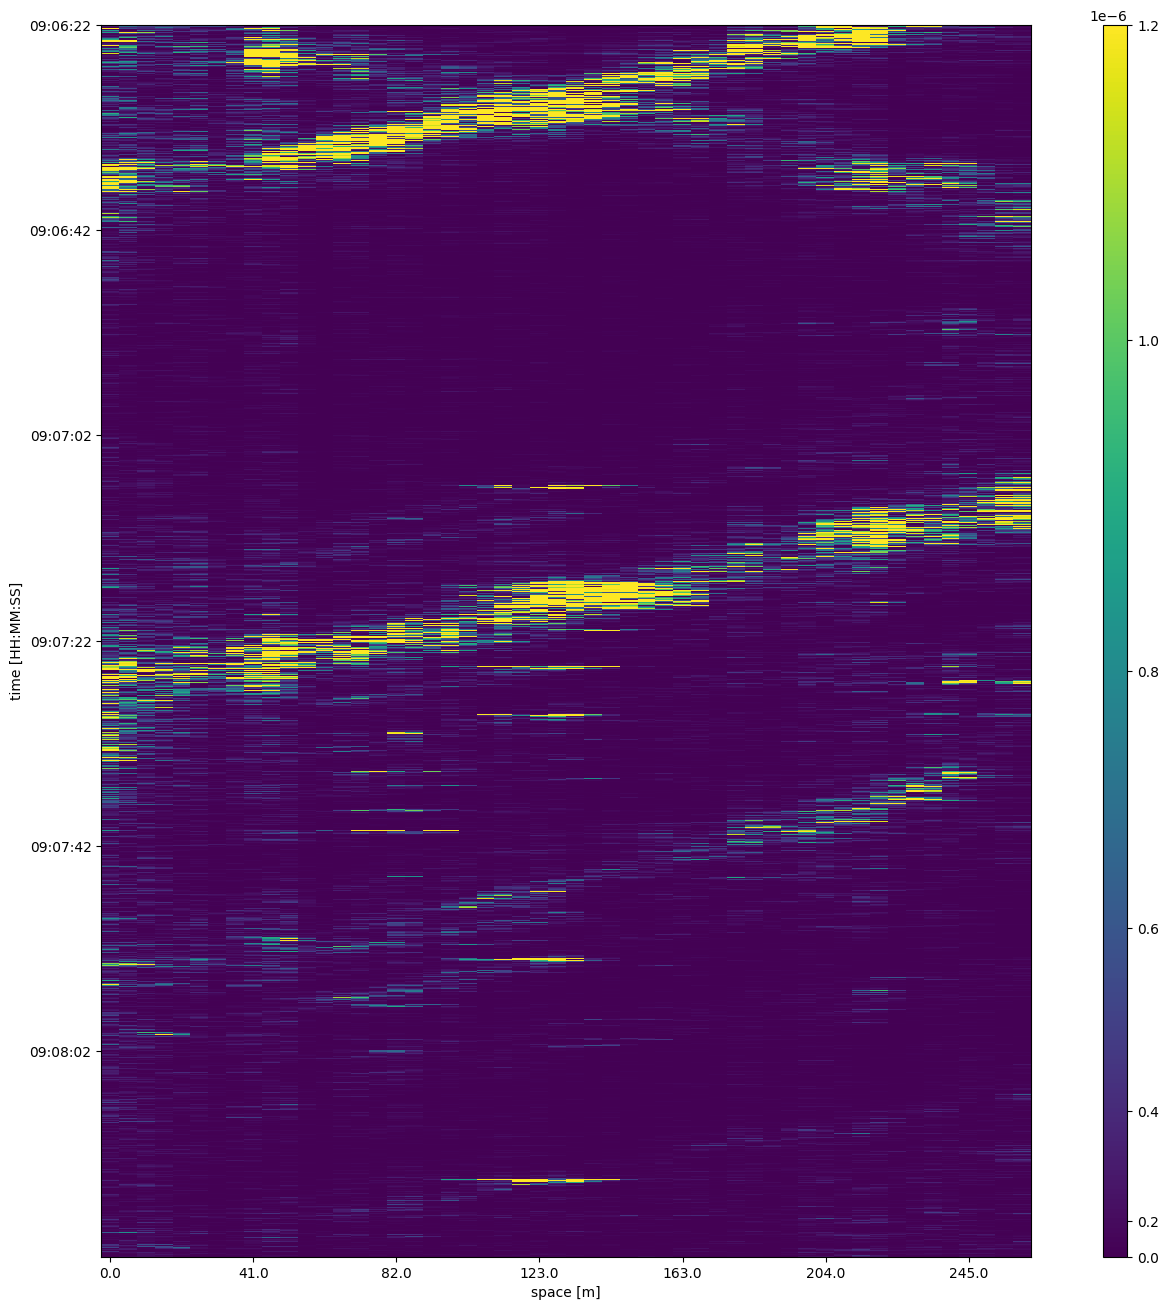

In [13]:
low, high = np.percentile(df, [2, 98]) 
norm_power = PowerNorm(vmin=low, vmax=high, clip=True, gamma = 2) #The higher gamma, the less noise we have in data but also less data

plotting_function(abs(data), index, columns, norm_power)

### **d) Standardized data** ###

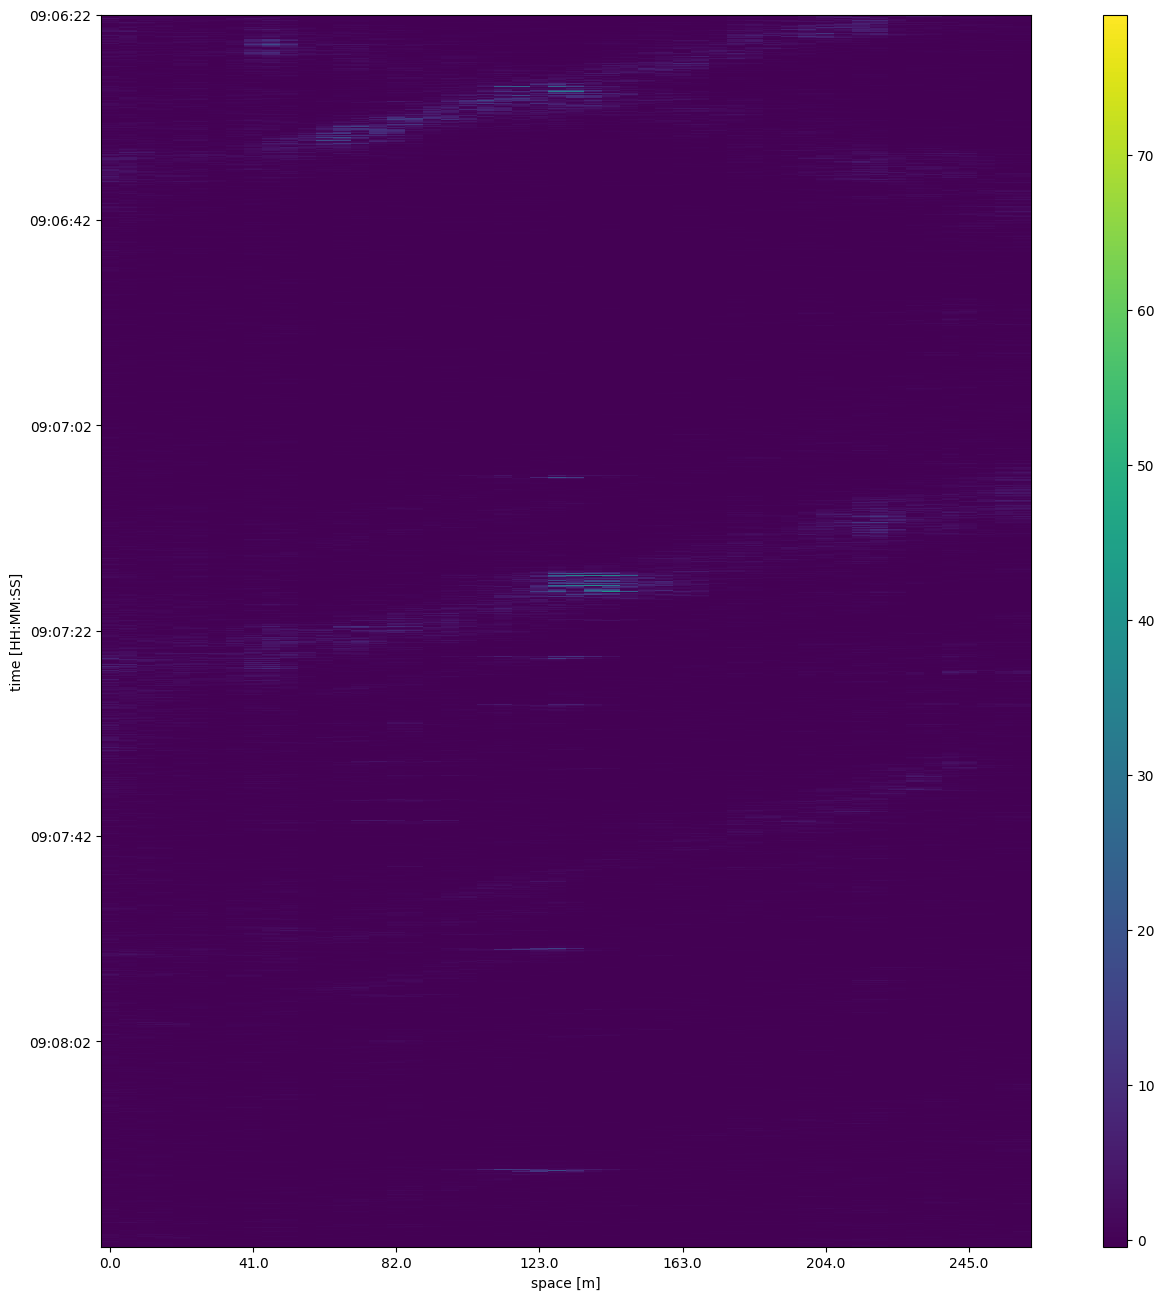

In [14]:
standardized_data = (abs(data) - np.mean(abs(data))) / np.std(abs(data))

plotting_function(standardized_data, index, columns)

### **e) Grayscale image** ###

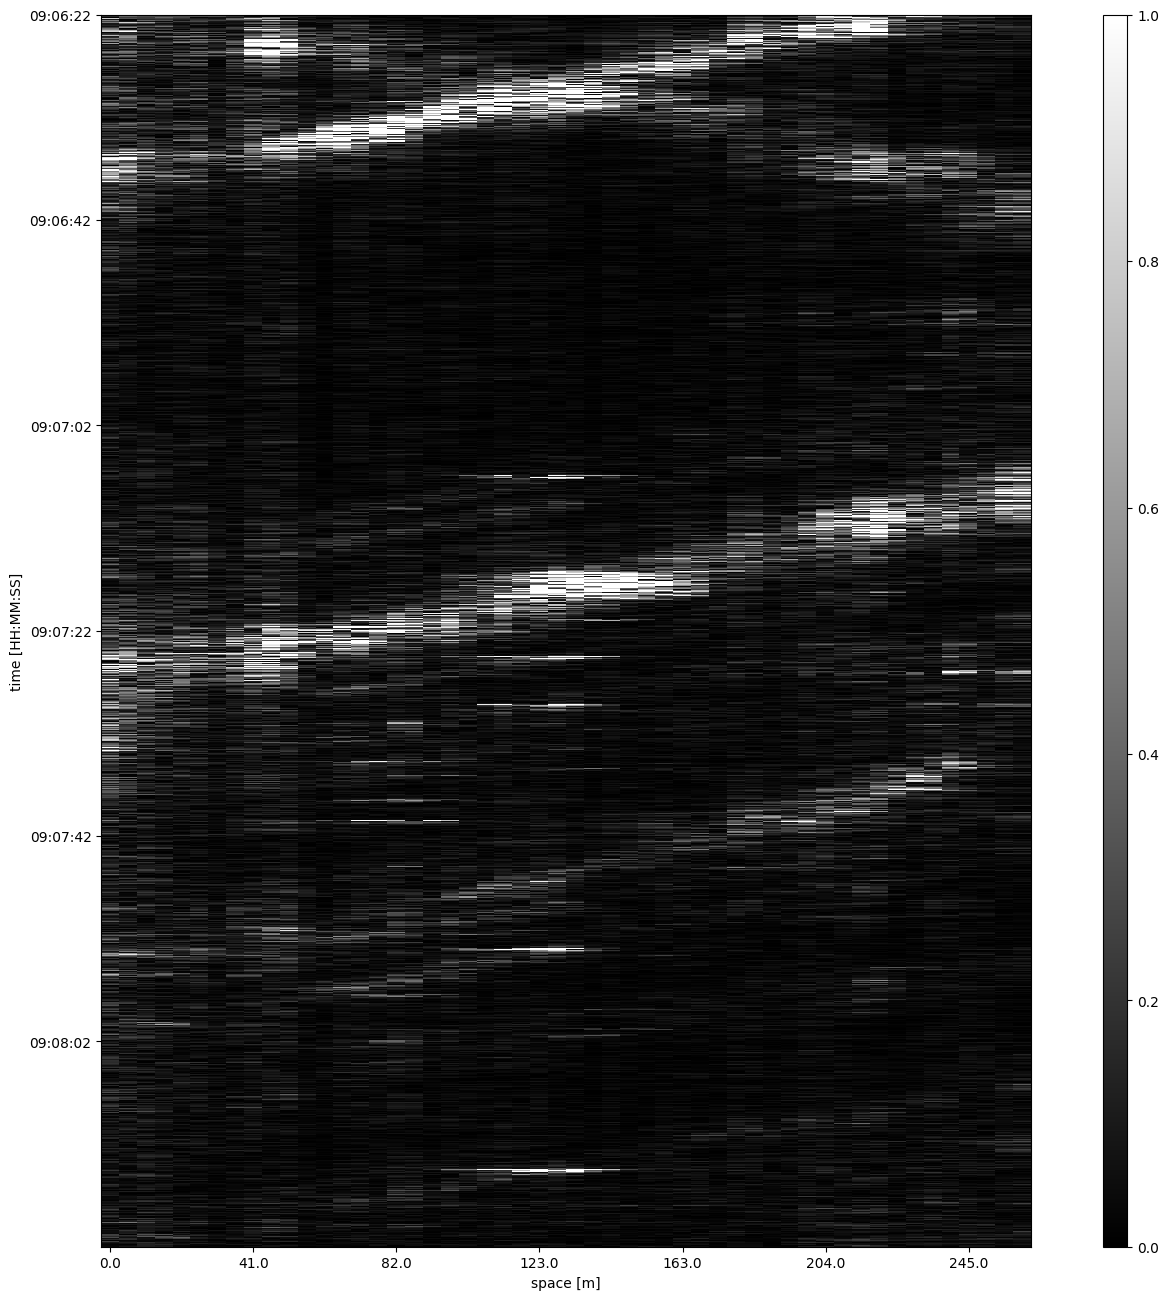

In [15]:
norm_mm_data = norm_mm(abs(data))
norm_log_data = norm_log(abs(data))
norm_power_data = norm_power(abs(data))
standardized_data = (abs(data) - np.mean(abs(data))) / np.std(abs(data))

display_gray(norm_mm_data, index, columns)

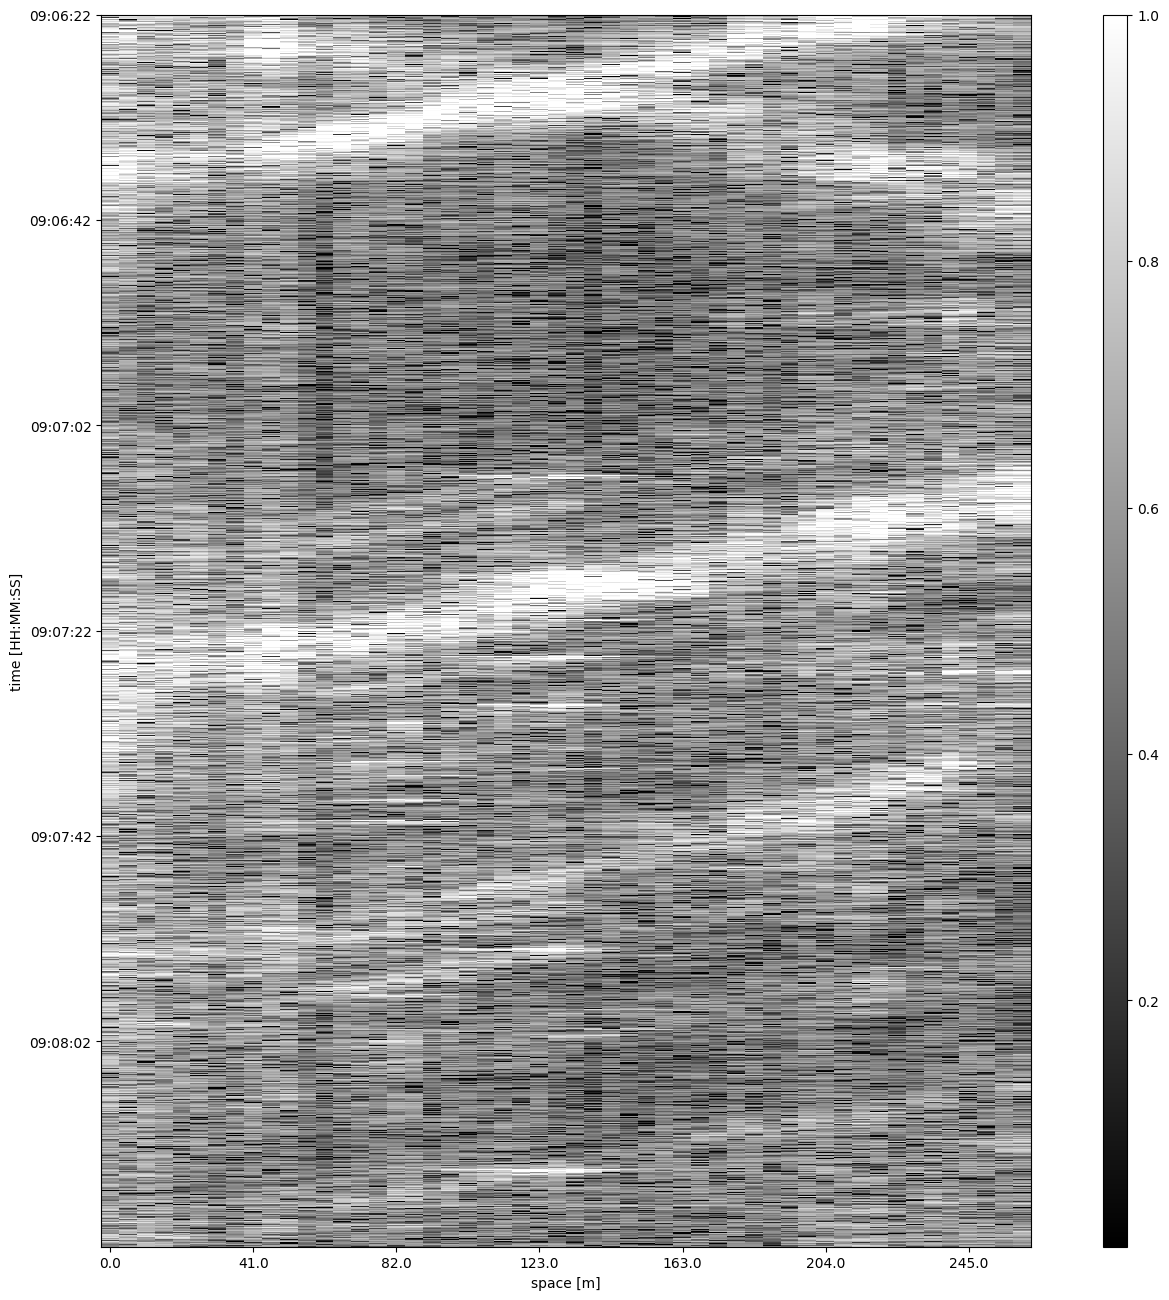

In [16]:
display_gray(norm_log_data, index, columns)

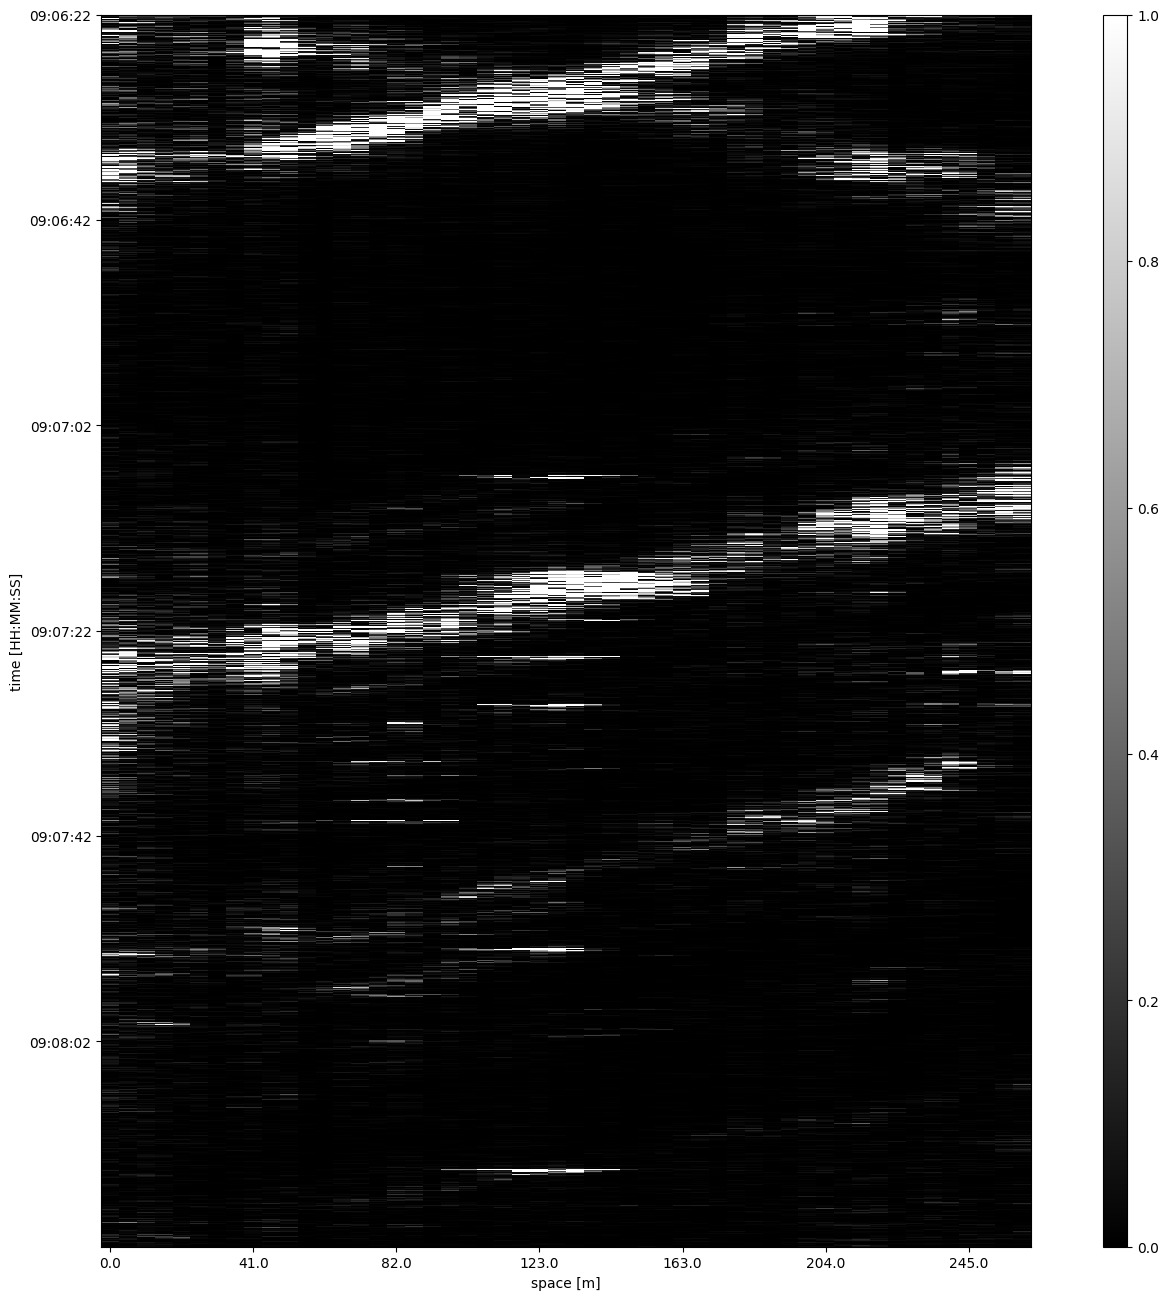

In [17]:
display_gray(norm_power_data, index, columns)

### **f) Binarized Image** ###

/Users/Kuba/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:4691: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


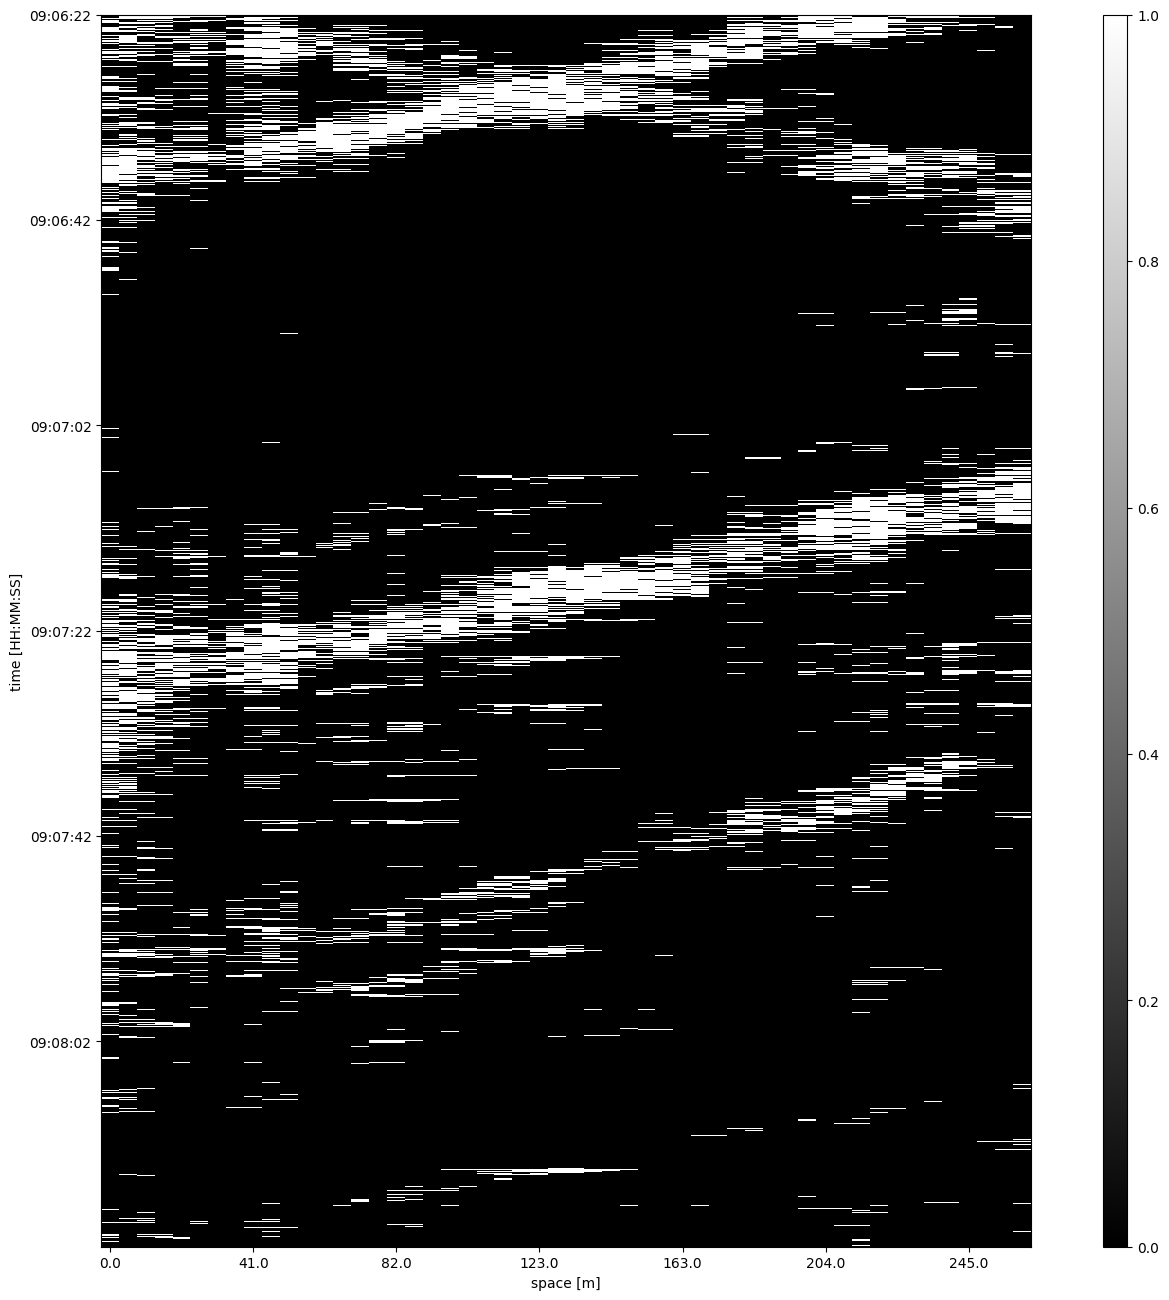

In [18]:
threshold = np.percentile(norm_mm_data, [90])
binarized_img = norm_mm_data > threshold
display_gray(binarized_img, index, columns) # No matter which data we take, result is always the same

### **g) Morphological operations** ###

#### **1. Proper Closing** ####

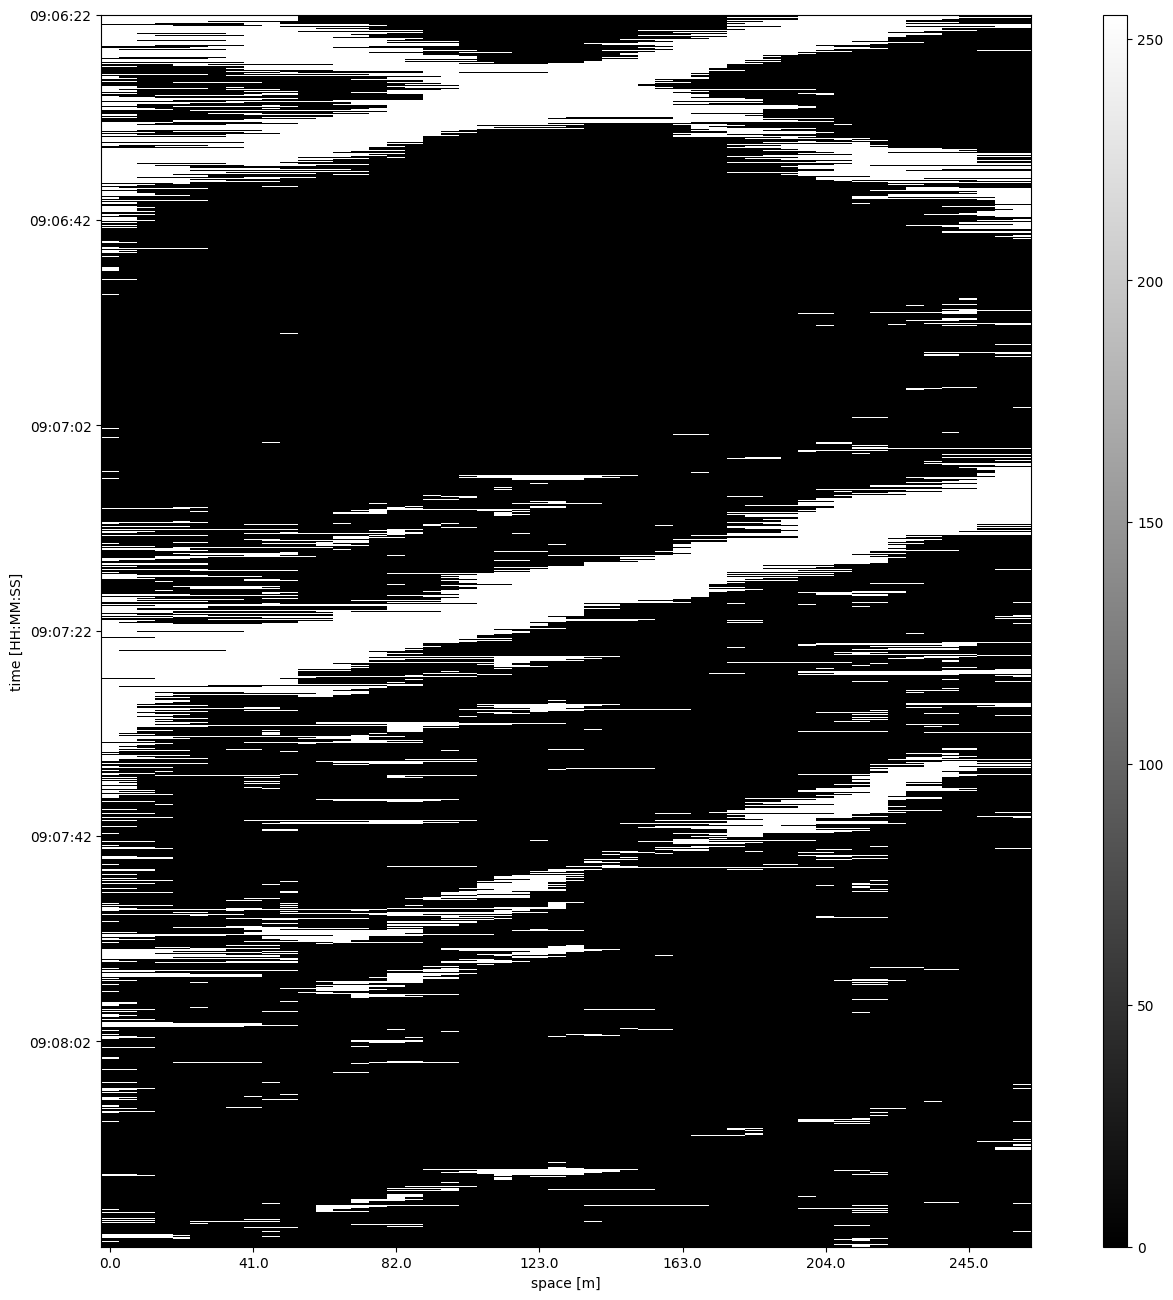

In [19]:
struct = np.ones([5, 5], np.uint8)

operation_1 = cv2.morphologyEx(binarized_img.astype(np.uint8) * 255, cv2.MORPH_CLOSE, struct) # CLOSING
display_gray(operation_1, index, columns)

#### **2. Proper Opening** ####

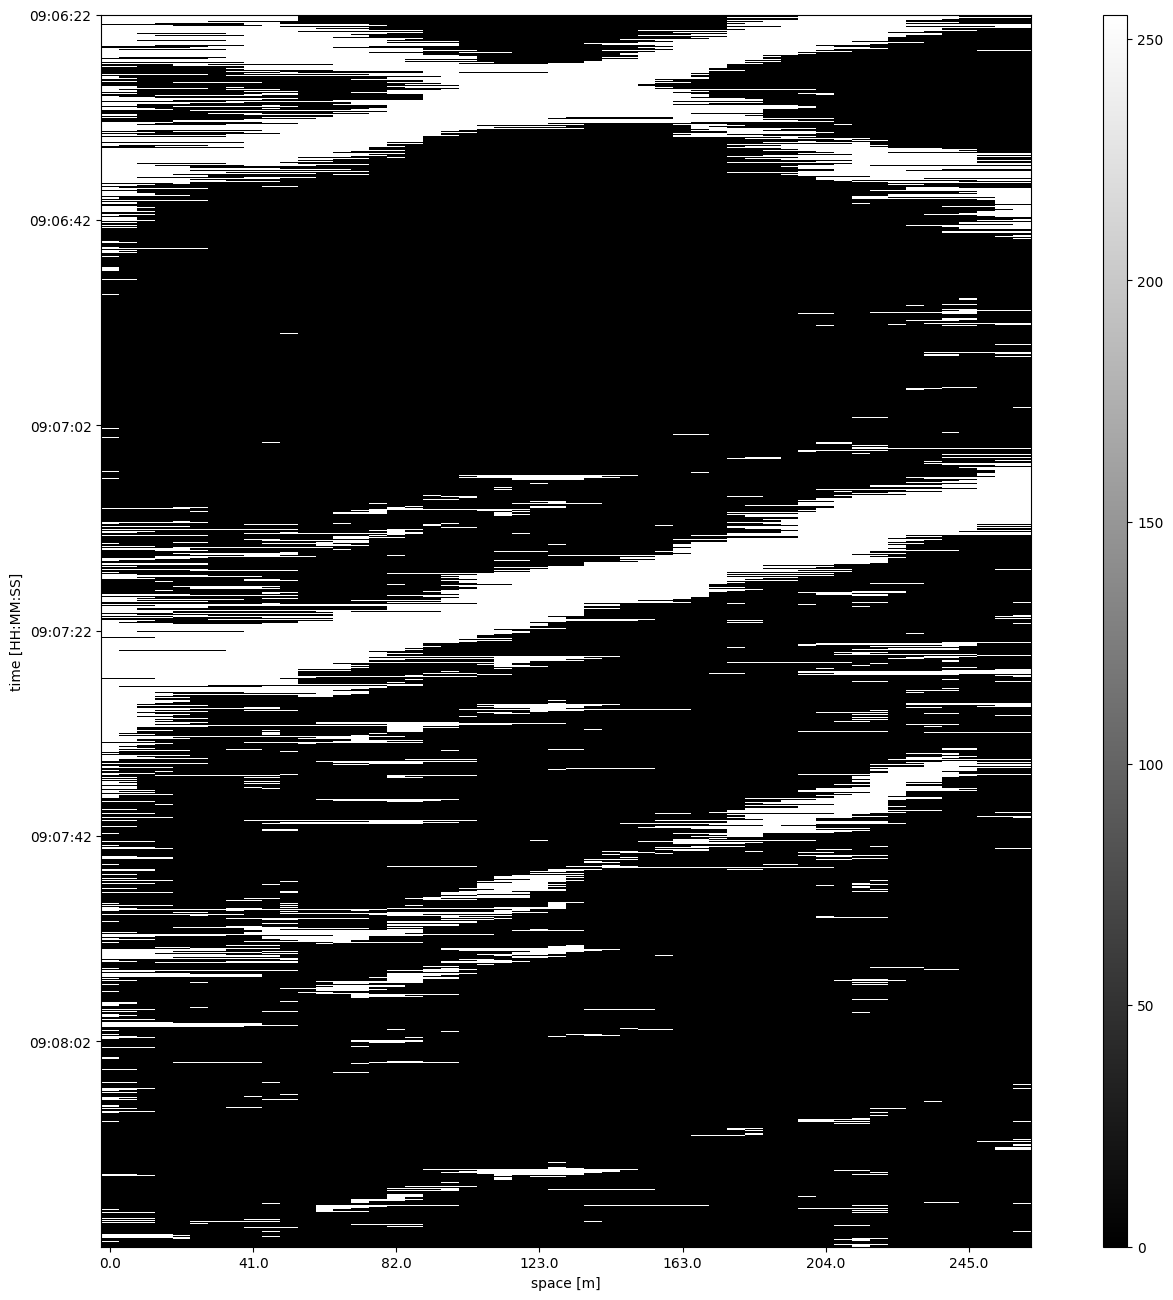

In [20]:
operation_2 = cv2.morphologyEx(binarized_img.astype(np.uint8) * 255, cv2.MORPH_OPEN, struct) # OPENING
display_gray(operation_1, index, columns)

#### **Automedian Filter** ####

In [21]:
def automedian_filter(img, struct):
    img_c = cv2.morphologyEx(img, cv2.MORPH_CLOSE, struct)
    img_co = cv2.morphologyEx(img_c, cv2.MORPH_OPEN, struct)
    img_coc = cv2.morphologyEx(img_co, cv2.MORPH_CLOSE, struct)

    img_o = cv2.morphologyEx(img, cv2.MORPH_OPEN, struct)
    img_oc = cv2.morphologyEx(img_o, cv2.MORPH_CLOSE, struct)
    img_oco = cv2.morphologyEx(img_oc, cv2.MORPH_OPEN, struct)

    Q_f = np.minimum(img_coc, img)
    A_f = np.maximum(Q_f, img_oco)

    return A_f

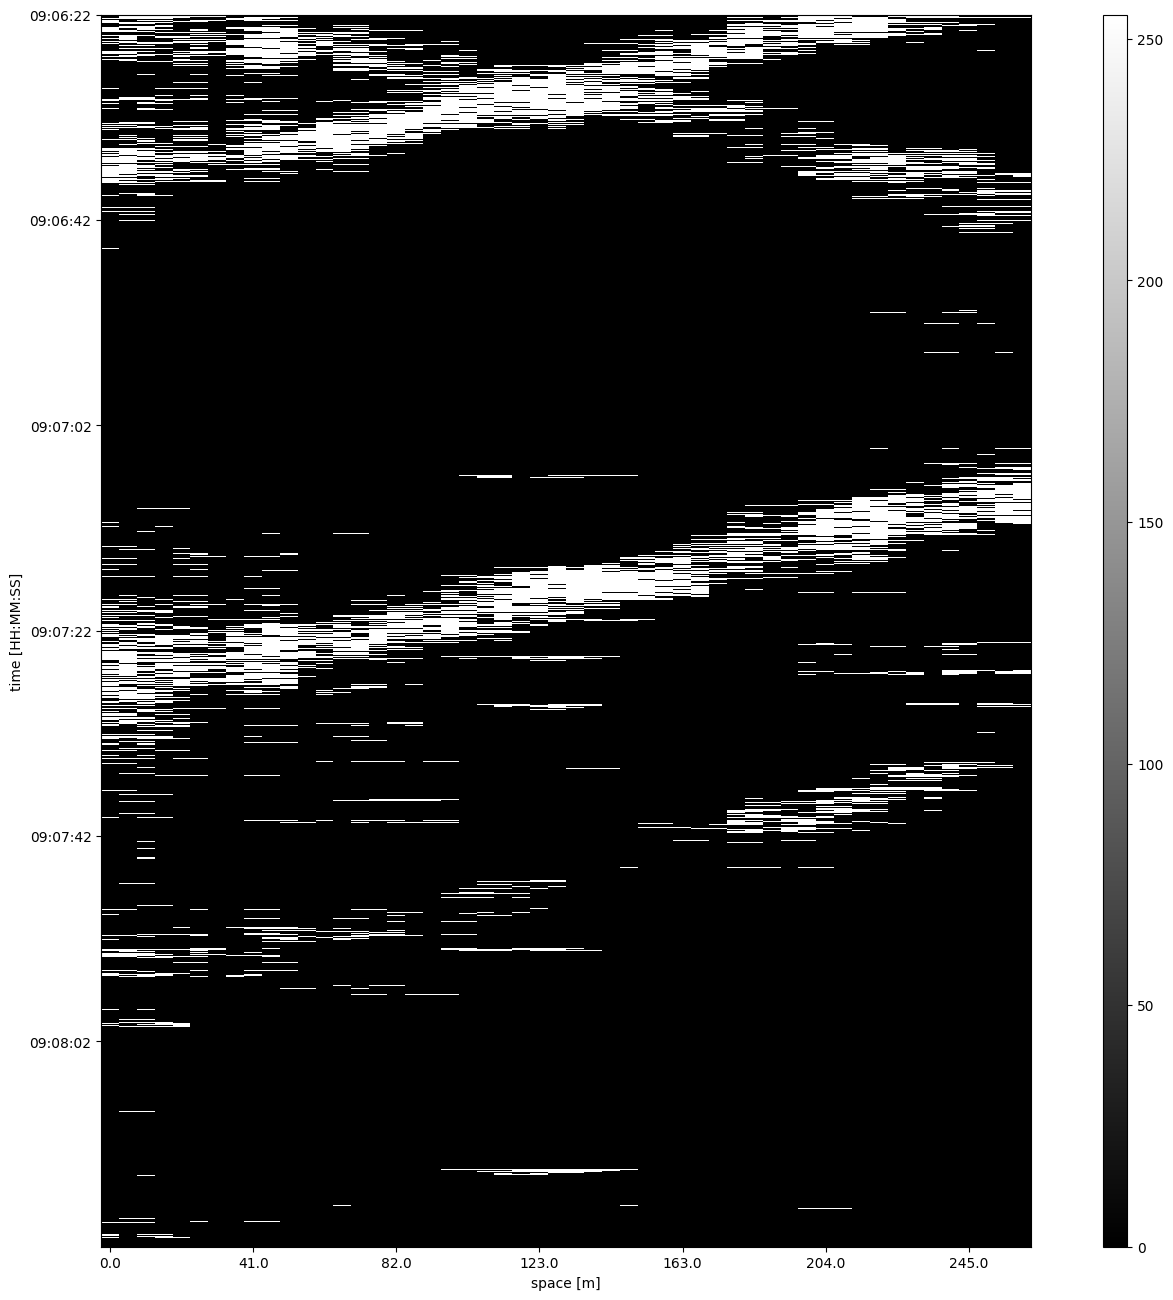

In [22]:
operation_3 = automedian_filter(binarized_img.astype(np.uint8) * 255, struct) # AUTOMEDIAN FILTER
display_gray(operation_3, index, columns)

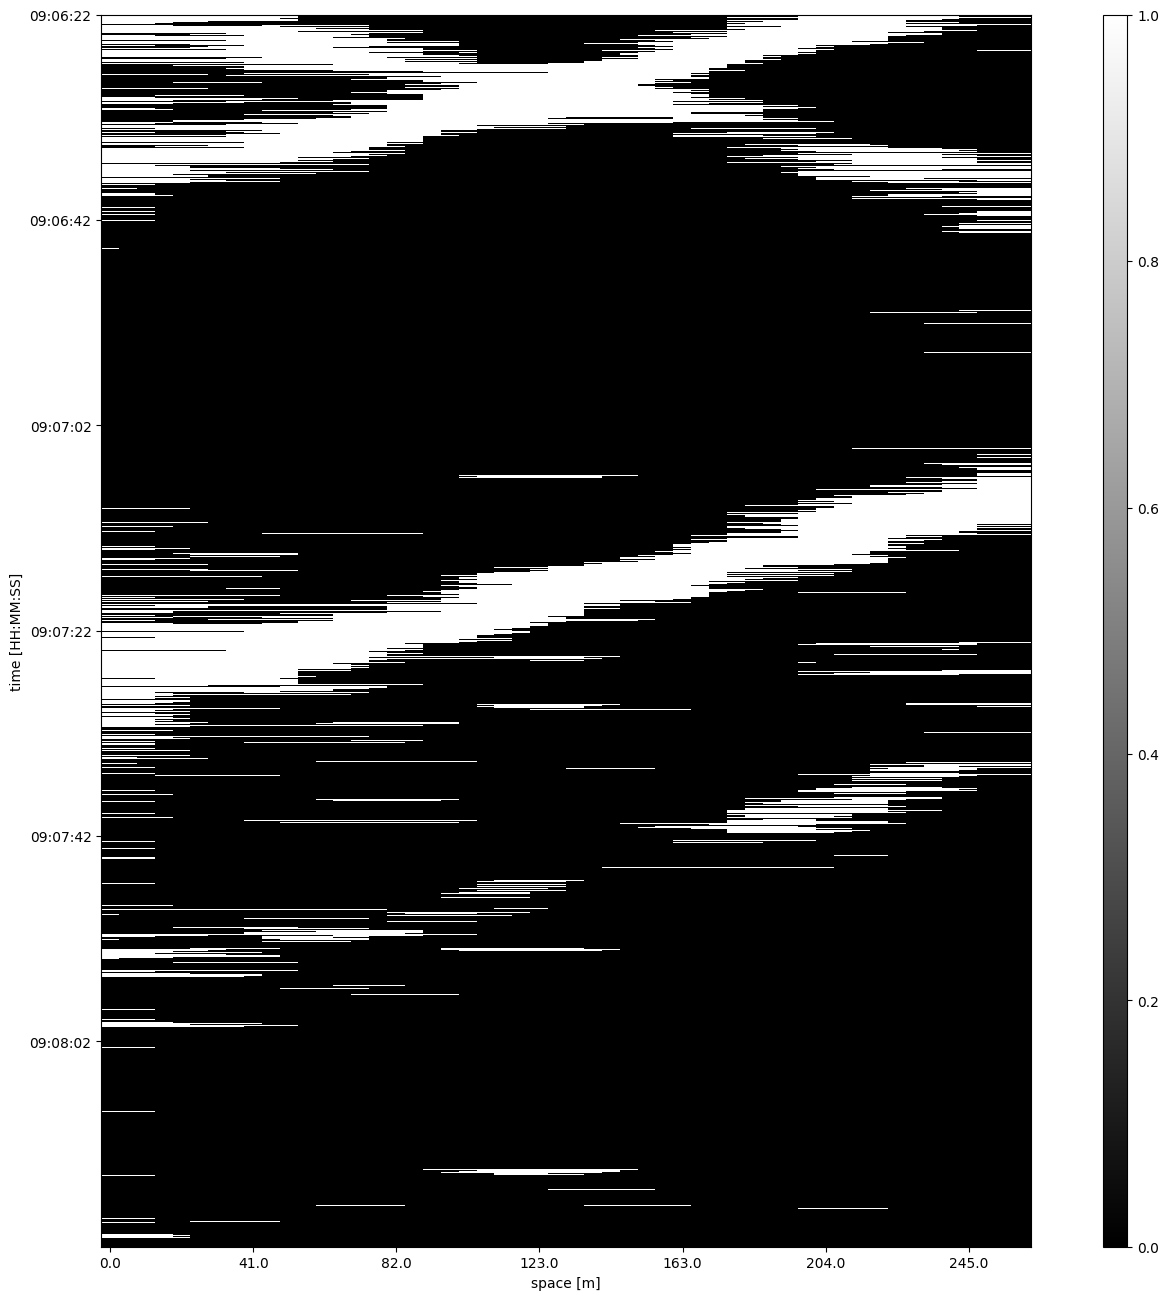

In [23]:
operation_4 = cv2.morphologyEx(operation_3.astype(np.uint8) * 255, cv2.MORPH_CLOSE, struct) # AUTOMEDIAN FILTER, CLOSING
display_gray(operation_4, index, columns)

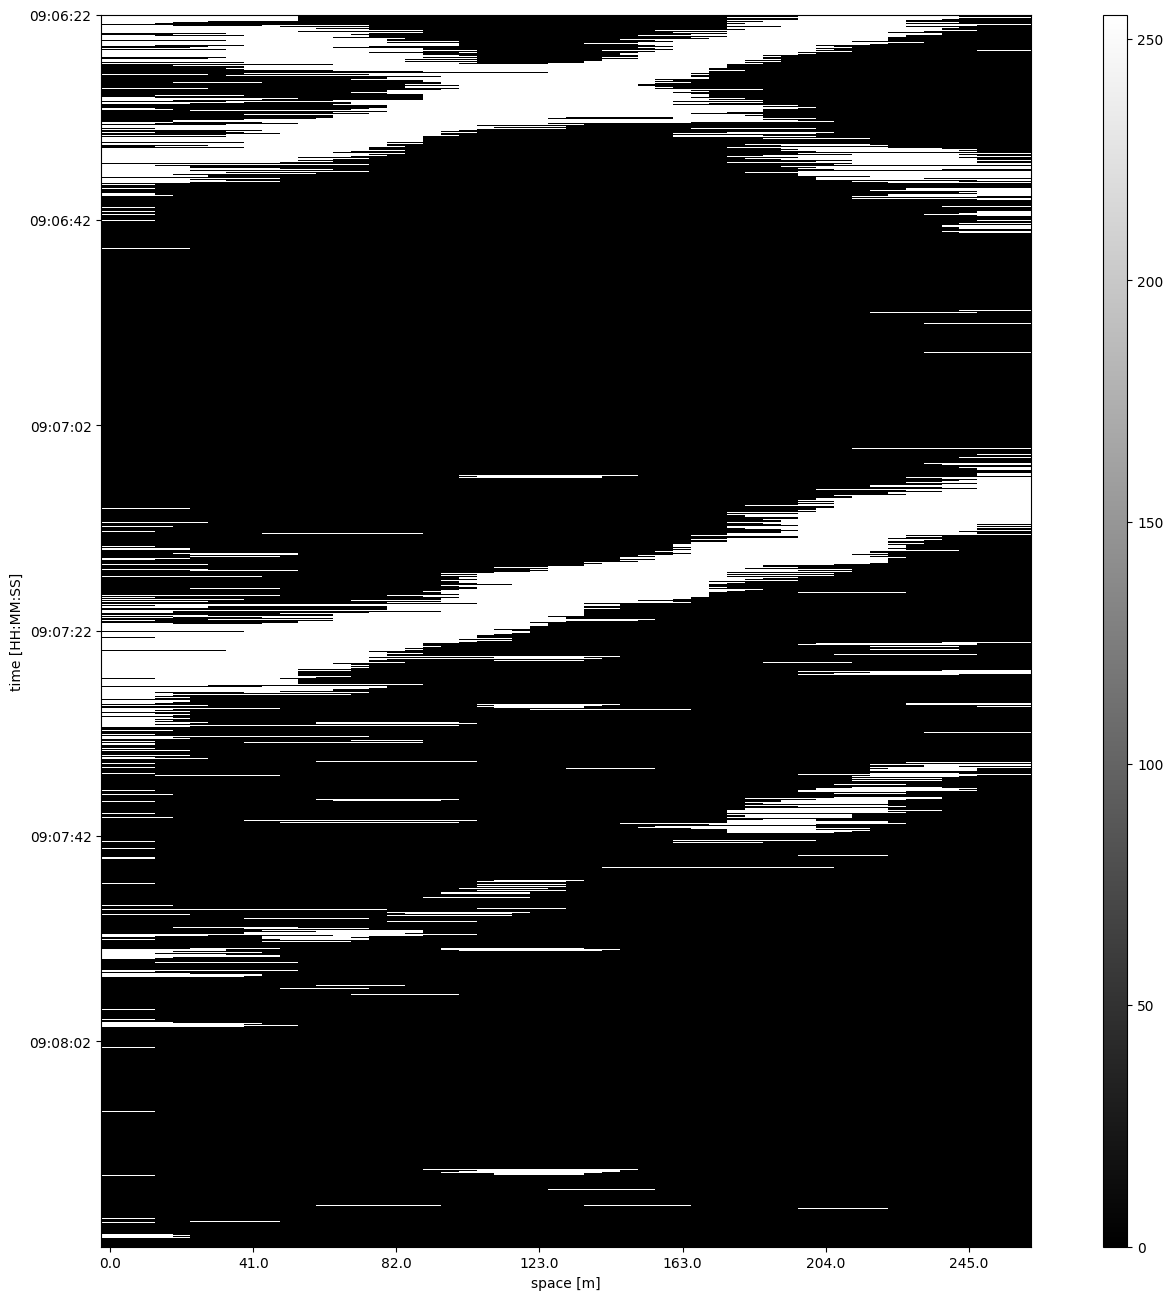

In [24]:
operation_5 = cv2.morphologyEx(binarized_img.astype(np.uint8) * 255, cv2.MORPH_CLOSE, struct) # CLOSING
operation_5 = automedian_filter(operation_5.astype(np.uint8) * 255, struct) # AUTOMEDIAN
operation_5 = automedian_filter(operation_5.astype(np.uint8) * 255, struct) # AUTOMEDIAN 2
display_gray(operation_5, index, columns)

In [ ]:
from numpy.lib.stride_tricks import as_strided

def match(img,struct):
    pad_width= (struct.shape[0] - 1) // 2
    pad_height = (struct.shape[1] - 1) // 2
    padded_img = np.pad(img, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=-2)
    window_shape = struct.shape
    output_shape = (padded_img.shape[0] - window_shape[0] + 1, padded_img.shape[1] - window_shape[1] + 1)
    strides = padded_img.strides * 2
    windowed_img = as_strided(padded_img, shape=output_shape + window_shape, strides=strides)
    return windowed_img
    

def dilate(img: np.ndarray, struct: np.ndarray) -> np.ndarray:
    windowed_img = match(img, struct)
    match_1 = (windowed_img == 0) & (struct == -1) 
    match_2 = (windowed_img == 1) & (struct == 1)
    dilation_matches = match_1 | match_2
    dilated_img = np.max(dilation_matches, axis=(-2, -1))
    return dilated_img
def erode(img: np.ndarray, struct: np.ndarray) -> np.ndarray:
    windowed_img = match(img, struct)
    match_1 = (windowed_img == 0) & (struct == -1) 
    match_2 = (windowed_img == 1) & (struct == 1)
    match_3 = (struct==0)
    erode_matches = match_1 | match_2 |match_3
    eroded_img = np.min(erode_matches, axis=(-2, -1))
    return eroded_img

def skeletonize(img):
    skeleton = np.logical_not(img.copy())
    skeleton_pr = None

    shape = skeleton.shape

    if (shape[0] != shape[1]):
        padding = (shape[0] - shape[1])//2
        rem = shape[0] - shape[1] - 2 * padding

    del shape

    s1 = np.array([[-1, -1, -1], [0, 1, 0], [1, 1, 1]])
    s2 = np.array([[0, -1, -1], [1, 1, -1], [0, 1, 0]])

    change = True
    iteration = 0

    while change and iteration < 25:
        iteration += 1
        print(iteration)
        for _ in range(4):
            hit_or_miss_1 = erode(skeleton, s1)
            neg_hit_or_miss_1 = np.logical_not(hit_or_miss_1)
            skeleton = np.logical_and(skeleton, neg_hit_or_miss_1)
            del neg_hit_or_miss_1, hit_or_miss_1

            hit_or_miss_2 = erode(skeleton, s2)
            neg_hit_or_miss_2 = np.logical_not(hit_or_miss_2)
            skeleton = np.logical_and(skeleton, neg_hit_or_miss_2)
            del neg_hit_or_miss_2, neg_hit_or_miss_2

            s1 = np.rot90(s1)
            s2 = np.rot90(s2)

        if np.all(skeleton == skeleton_pr):
                change = False
        skeleton_pr = skeleton.copy()
    return skeleton

In [ ]:
skeleton = skeletonize(binarized_img)

1
